# First we Import the Libraary

In [1]:
import pandas as pd
import numpy as np


#  Load the Dataset


In [3]:
df  = pd.read_csv("diabetesData.csv")

In [4]:
df

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [5]:
df.head()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age,target
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


# Data Preprocessing
- Handle missing data and encode categorical features.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num_preg             768 non-null    int64  
 1   plasma_glucose_conc  768 non-null    int64  
 2   bp                   768 non-null    int64  
 3   tricepsthickness     768 non-null    int64  
 4   insulin              768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   pedigree_func        768 non-null    float64
 7   age                  768 non-null    int64  
 8   target               768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [7]:
df.describe()

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
df.isna().sum()

num_preg               0
plasma_glucose_conc    0
bp                     0
tricepsthickness       0
insulin                0
BMI                    0
pedigree_func          0
age                    0
target                 0
dtype: int64

In [9]:
df['target'] = df['target'].replace({'tested_positive': 1, 'tested_negative': 0})

C:\Users\SAJID\AppData\Local\Temp\ipykernel_17104\2221127277.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'tested_positive': 1, 'tested_negative': 0})


# Feature Selection and Target Definition
- Select your features (X) and target (y).

In [12]:
X = df.drop('target',axis=1)
X

,num_preg,plasma_glucose_conc,bp,tricepsthickness,insulin,BMI,pedigree_func,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [13]:
y  = df.target
y.value_counts()

target
0    500
1    268
Name: count, dtype: int64

# Check Balance in Data

In [14]:
print(df['target'].value_counts())
print(df['target'].value_counts(normalize=True))  # Proportions


target
0    500
1    268
Name: count, dtype: int64
target
0    0.651042
1    0.348958
Name: proportion, dtype: float64


### Using Visualization:

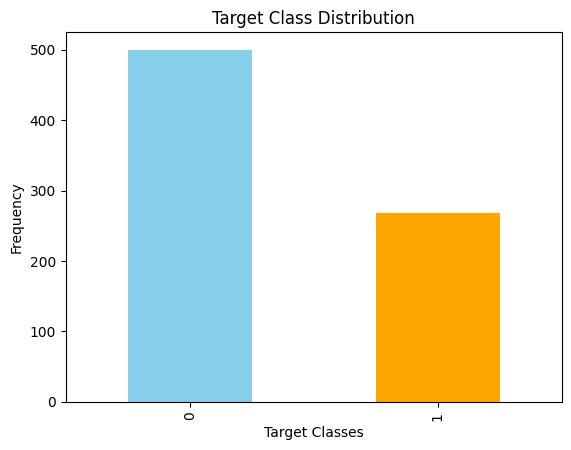

In [15]:
import matplotlib.pyplot as plt

df['target'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Target Class Distribution")
plt.xlabel("Target Classes")
plt.ylabel("Frequency")
plt.show()


In [16]:
!pip install imbalanced-learn


##  Resampling Techniques
- Oversampling: Increase the minority class (1) 

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Resampled class distribution:", Counter(y_resampled))


Resampled class distribution: Counter({1: 500, 0: 500})


#  Split the Data
-  Split the data into training and testing sets using train_test_split.

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

#  Train Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
diabetes_model = LogisticRegression()

In [21]:
diabetes_model.fit(X_train,y_train)

C:\Users\SAJID\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predictions of Training Data

In [22]:
y_train_pred = diabetes_model.predict(X_train)

In [23]:
pd.DataFrame({"Original":y_train, "Prediction":y_train_pred})

,Original,Prediction
762,0,0
127,0,0
564,0,0
375,1,1
663,1,1
...,...,...
763,0,0
192,1,1
629,0,0
559,0,0


# Evaluation Matrices of a classfication Model 

In [24]:
correct = 0
for o,p in zip(y_train, y_train_pred):
    if o==p:
        correct+=1
        
print(f"Accuracy of our classification model is {(correct/len(y_train)*100)}%")

Accuracy of our classification model is 77.08333333333334%


In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)

0.7708333333333334

In [26]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       370
           1       0.72      0.58      0.65       206

    accuracy                           0.77       576
   macro avg       0.76      0.73      0.74       576
weighted avg       0.77      0.77      0.76       576



In [27]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train, y_train_pred))

[[324  46]
 [ 86 120]]


# Preditions on Test Data 

In [28]:
y_test_pred = diabetes_model.predict(X_test)

In [29]:
pd.DataFrame({"Original":y_test, "Prediction":y_test_pred})

,Original,Prediction
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
366,1,0
301,1,0
382,0,0
140,0,0


In [30]:
correct = 0
for o,p in zip(y_test, y_test_pred):
    if o==p:
        correct+=1
        
print(f"Accuracy of our classification model is {(correct/len(y_test)*100)}%")

Accuracy of our classification model is 79.16666666666666%


In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.7916666666666666

In [32]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       130
           1       0.71      0.60      0.65        62

    accuracy                           0.79       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.79      0.79      0.79       192



In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[115  15]
 [ 25  37]]


#  Scale the Data
- Logistic Regression often performs better when features are scaled.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Train your model on scaled data:

In [35]:
from sklearn.linear_model import LogisticRegression

# Define the model with balanced class weights and a higher iteration limit
log_model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=500)

# Fit the model
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)


# Perform Hyperparameter Tuning
- Search for optimal parameters for better performance

In [36]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500],
    'C': [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(LogisticRegression(), param_grid, scoring='accuracy', cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 0.01, 'max_iter': 100, 'solver': 'liblinear'}


### Address Class Imbalance with Class Weights

In [37]:
log_model = LogisticRegression(class_weight='balanced', solver='lbfgs', max_iter=500)
log_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=500)

## Evaluate Performance with Different Metrics

In [38]:
label_mapping = {'tested_negative': 0, 'tested_positive': 1}
y_pred_mapped = [label_mapping[label] for label in y_pred]

# Now generate the classification report
from sklearn.metrics import classification_report, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred_mapped))
print("ROC AUC Score:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]))


KeyError: 1

#  Experiment with Other Models
- Try models that handle non-linear relationships better:

# Random Forest:

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
diabetes_model1 = RandomForestClassifier()

In [41]:
diabetes_model1.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_train_pred1 = diabetes_model1.predict(X_train)

In [47]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       370
           1       1.00      1.00      1.00       206

    accuracy                           1.00       576
   macro avg       1.00      1.00      1.00       576
weighted avg       1.00      1.00      1.00       576



In [48]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [49]:
y_train_pred2 = svm_model.predict(X_train)

In [50]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred2))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       370
           1       0.75      0.49      0.59       206

    accuracy                           0.76       576
   macro avg       0.76      0.70      0.71       576
weighted avg       0.76      0.76      0.74       576



In [60]:
def diabetes_pred(df):
    if diabetes_model.predict(df)==0:
        return "No Diabetes"
    else: 
        return "Diabetes"

In [61]:
record = []
for feature in df.columns[:-1]:    
    record.append(float(input(f"{feature} : ")))
diabetes_pred(np.array(record).reshape(1,len(record)))

num_preg :  0
plasma_glucose_conc :  85
bp :  70
tricepsthickness :  20
insulin :  79
BMI :  21.5
pedigree_func :  0.2
age :  25


C:\Users\SAJID\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'No Diabetes'

In [ ]:
Pregnancies    Glucose    BloodPressure    SkinThickness    Insulin    BMI    DPF    Age    Target
0              85         70               20               79         21.5   0.2    25     0


In [55]:
# 8	183	64	0	0	23.3	0.672	32	tested_positive

# Save the Model

In [63]:
import joblib

# Save the model
joblib.dump(diabetes_model, 'Daibetes_model')  


['Daibetes_model']